## Detectron2 beginner tutorial

### Some basic setup

In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import os
from matplotlib.pyplot import figure
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

### Inference with pre-trained models

In [2]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

In [3]:
im = cv2.imread("./input.jpg")

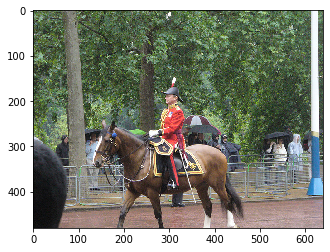

In [4]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [5]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/pretrained_models/RetinaNet/model_final_59f53c.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ../repos/detectron2/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [11/08 14:49:15 d2.config.compat]: Config '../repos/detectron2/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [6]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes 
outputs["instances"].pred_boxes 
outputs["instances"].scores 

tensor([0.9706, 0.8747, 0.8653, 0.7662, 0.7455, 0.7374, 0.7038, 0.6823, 0.6515,
        0.5969, 0.5468], device='cuda:0')

In [7]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


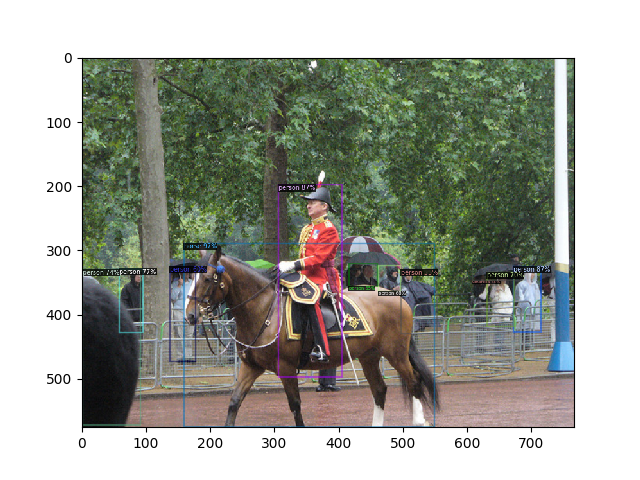

In [9]:
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

In [10]:
outputs

{'instances': Instances(num_instances=11, image_height=480, image_width=640, fields=[pred_boxes = Boxes(tensor([[132.5937, 242.2938, 457.8400, 479.7706],
         [254.9828, 166.5730, 337.7393, 414.8047],
         [559.9357, 271.7328, 595.5008, 356.8928],
         [ 48.7343, 275.0825,  79.3479, 358.1465],
         [506.9619, 266.9182, 569.6402, 290.6413],
         [  0.6501, 275.9706,  75.4222, 477.1220],
         [525.4608, 279.8608, 561.1824, 349.8389],
         [385.1291, 271.3568, 413.2227, 304.3592],
         [346.3119, 268.7670, 383.6153, 298.0082],
         [114.2905, 272.0125, 147.8336, 394.7779],
         [414.0936, 276.1142, 460.5254, 359.3415]], device='cuda:0')), scores = tensor([0.9706, 0.8747, 0.8653, 0.7662, 0.7455, 0.7374, 0.7038, 0.6823, 0.6515,
         0.5969, 0.5468], device='cuda:0'), pred_classes = tensor([17,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0], device='cuda:0'), ])}

In [12]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'RetinaNet', 'WEIGHTS': '/home/ubuntu/gfav/repos/detectron2/pretrained_models/RetinaNet/model_final_59f53c.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_retinanet_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 40.31747359663594, 50.79683366298238], [64, 80.63494719327188, 101.59366732596476], [128, 161.26989438654377, 203.18733465192952], [256, 322.53978877308754, 406.37466930385904], [512, 645.0795775461751, 812.7493386077181]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]]}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHea

### Training RetinaNet 

In [1]:
# python tools/train_net.py --config-file configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml SOLVER.IMS_PER_BATCH 2 SOLVER.BASE_LR 0.01

### Inference with RetinaNet trained on PascalVOC

<IPython.core.display.Javascript object>


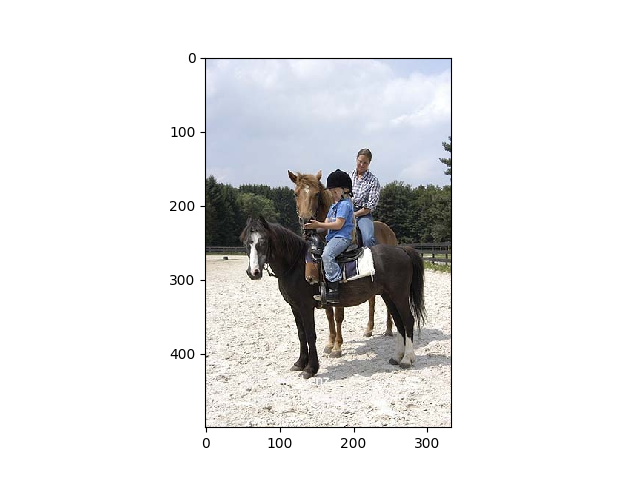

In [17]:
im = cv2.imread("/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/002596.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [18]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/output_pascalvoc_exp2/model_final.pth"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ../repos/detectron2/configs/PascalVOC-Detection/../Base-RetinaNet-VOC.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [11/12 13:47:29 d2.config.compat]: Config '../repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [7]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'RetinaNet', 'WEIGHTS': '/home/ubuntu/gfav/repos/detectron2/output_pascalvoc_exp2/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_retinanet_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 40.31747359663594, 50.79683366298238], [64, 80.63494719327188, 101.59366732596476], [128, 161.26989438654377, 203.18733465192952], [256, 322.53978877308754, 406.37466930385904], [512, 645.0795775461751, 812.7493386077181]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]]}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATU

In [19]:
outputs

{'instances': Instances(num_instances=4, image_height=500, image_width=332, fields=[pred_boxes = Boxes(tensor([[119.2758, 150.1148, 204.8802, 326.9648],
         [190.8268, 123.7148, 239.3992, 264.5460],
         [ 53.8621, 206.9271, 297.9763, 430.4082],
         [101.5940, 153.3645, 252.6088, 381.7704]], device='cuda:0')), scores = tensor([0.9080, 0.8556, 0.8339, 0.5591], device='cuda:0'), pred_classes = tensor([14, 14, 12, 12], device='cuda:0'), ])}

In [20]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

<IPython.core.display.Javascript object>


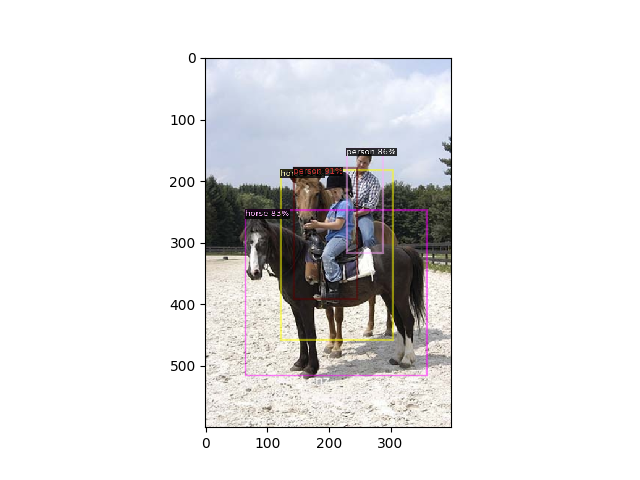

In [21]:
%matplotlib notebook
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

### Inference with RetinaNet trained on idler data

In [2]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.3  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/output_idler_exp15/model_0004799.pth"
predictor = DefaultPredictor(cfg)

Loading config /home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/../Base-RetinaNet-VOC.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [12/10 13:47:01 d2.config.compat]: Config '/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [3]:
%matplotlib inline
with open('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/ImageSets/Main/test_exp4.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content] 
for im_name in content:
    im = cv2.imread("/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/" + im_name + '.jpg')
    outputs = predictor(im)
    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    cv2.imwrite('/home/ubuntu/gfav/data/phase2/exp4_results_without_thresh/' + im_name + '.jpg', v.get_image()[:, :, ::-1])
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
#     break

## extract IR and RGB crops

In [19]:
# img_list = os.listdir('/home/ubuntu/gfav/data/phase3/shortlisted_frames/')
# for img_name in img_list:
#     if img_name[-3:] == 'png':
#         ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/' + img_name)
#         ir_crop = ir_image[3:668, 220:1085, :].copy()
#         cv2.imwrite('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_IR/' + img_name, ir_crop)
# #         figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
# #         plt.imshow(cv2.cvtColor(ir_crop, cv2.COLOR_BGR2RGB))
# #         plt.show()
#     if img_name[-3:] == 'jpg':
#         rgb_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/' + img_name)
#         rgb_crop = rgb_image[440:1640, 1040:2750, :].copy()
#         cv2.imwrite('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_RGB/' + img_name, rgb_crop)
# #         figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
# #         plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
# #         plt.show()

<IPython.core.display.Javascript object>


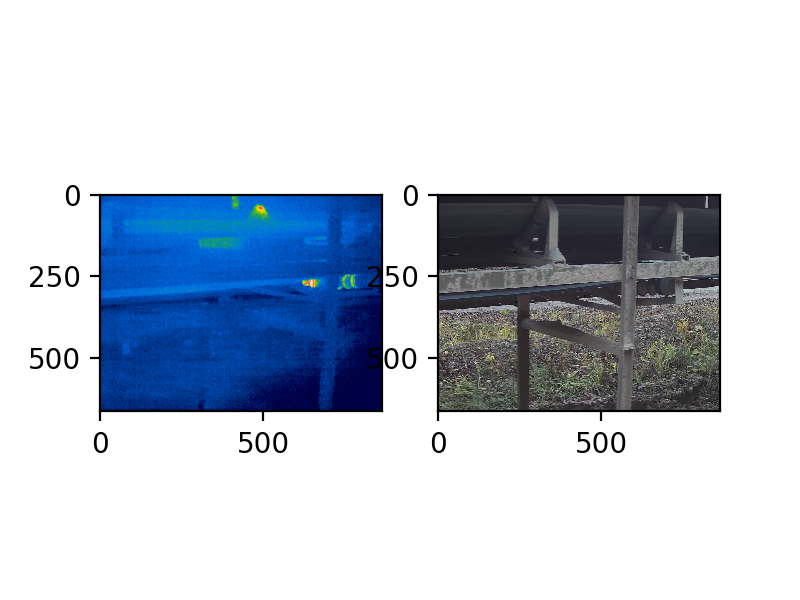

In [18]:
# %matplotlib notebook
# img_list = os.listdir('/home/ubuntu/gfav/data/phase3/shortlisted_frames/output_RGB/')
# for img_name in img_list:
    
#     ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/' + img_name[:-3] + 'png')
#     ir_crop = ir_image[3:668, 220:1085, :].copy()
# #         cv2.imwrite('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_IR/' + img_name, ir_crop)
#     figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
#     plt.subplot(1,2,1)
#     plt.imshow(cv2.cvtColor(ir_crop, cv2.COLOR_BGR2RGB))

#     rgb_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/' + img_name)
#     rgb_crop = rgb_image[440:1640, 1040:2750, :].copy()
#     rgb_crop = cv2.resize(rgb_crop, (ir_crop.shape[1], ir_crop.shape[0]))
# #         cv2.imwrite('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_RGB/' + img_name, rgb_crop)
#     plt.subplot(1,2,2)
#     plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
#     plt.show()
#     break

ir_image shape: (1340, 1720, 3)
rgb_image shape: (2160, 3840, 3)
rgb_crop shape: (1340, 1720, 3)


<IPython.core.display.Javascript object>


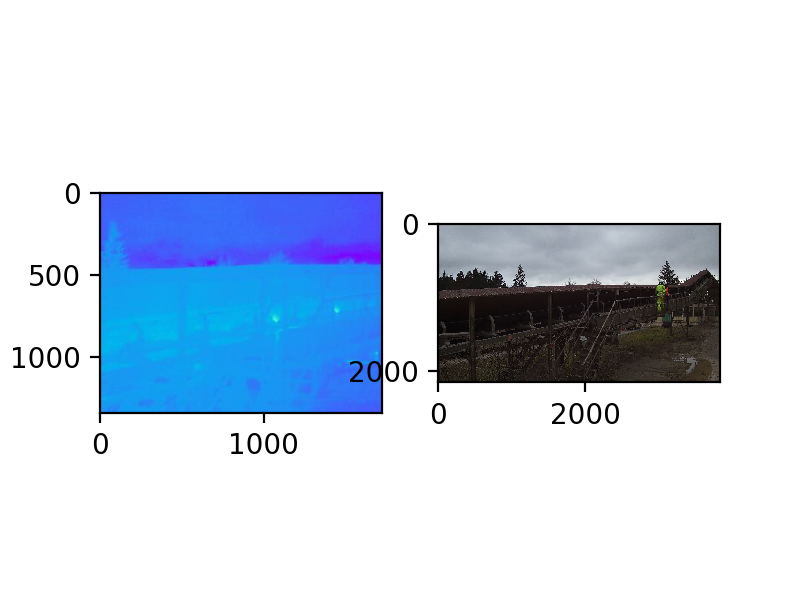

In [6]:
# %matplotlib notebook
# ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/ir_frames/DJI_3009_0/3009000000.jpg')
# print('ir_image shape:', ir_image.shape)
# rgb_image = cv2.imread('/home/ubuntu/gfav/data/phase3/rgb_frames_int/DJI_3009_0/3009000000.jpg')
# print('rgb_image shape:', rgb_image.shape)
# rgb_crop = rgb_image[413:1753, 1050:2770, :].copy()
# print('rgb_crop shape:', rgb_crop.shape)
# ir_resize = cv2.resize(ir_image, (rgb_crop.shape[1], rgb_crop.shape[0]))
# figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
# plt.show()
# figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
# plt.show()
# figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(ir_resize, cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
# plt.show()

### map ir and rgb image

In [5]:
# frame_name: 3005000000.jpg
# (x1, y1)
ir_1 = (113, 158)
rgb_1 = (1598, 1238)
ir_2 = (279, 128)
rgb_2 = (2475, 1084)
ir_to_rgb_x_axis = (ir_2[0] - ir_1[0]) / (rgb_2[0] - rgb_1[0])
ir_to_rgb_y_axis = (ir_1[1] - ir_2[1]) / (rgb_1[1] - rgb_2[1])
ir_shape = (256, 336) # (row, col) or (y, x)
left_margin_rgb = ir_1[0] / ir_to_rgb_x_axis
right_margin_rgb = (ir_shape[1] - ir_2[0]) / ir_to_rgb_x_axis
left_cord_rgb = int(rgb_1[0] - left_margin_rgb)
right_cord_rgb = int(rgb_2[0] + right_margin_rgb)
print(left_cord_rgb, right_cord_rgb)
top_margin_rgb = ir_2[1] / ir_to_rgb_y_axis
bottom_margin_rgb = (ir_shape[0] - ir_1[1]) / ir_to_rgb_y_axis
top_cord_rgb = int(rgb_2[1] - top_margin_rgb)
bottom_cord_rgb = int(rgb_1[1] + bottom_margin_rgb)
print(top_cord_rgb, bottom_cord_rgb)

1001 2776
426 1741


ir_image shape: (256, 336, 3)
rgb_image shape: (2160, 3840, 3)
rgb_crop shape: (1315, 1775, 3)


<IPython.core.display.Javascript object>


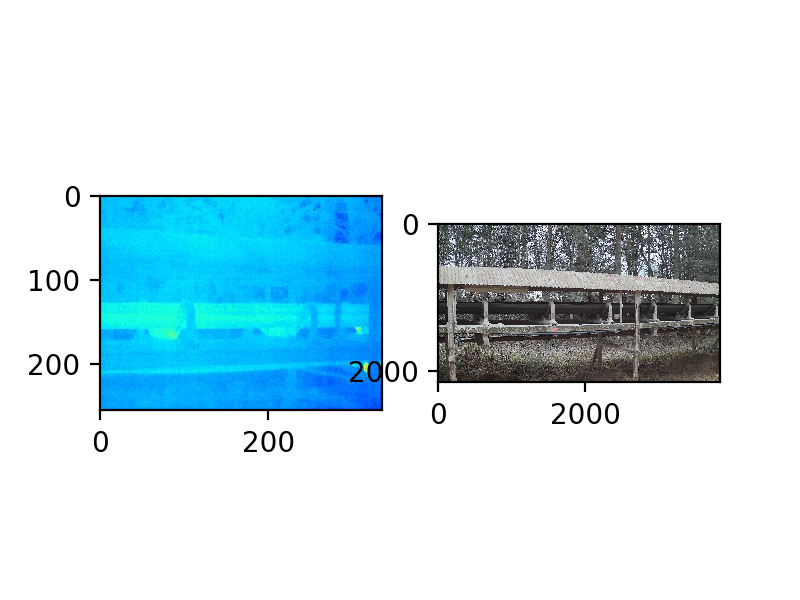

<IPython.core.display.Javascript object>


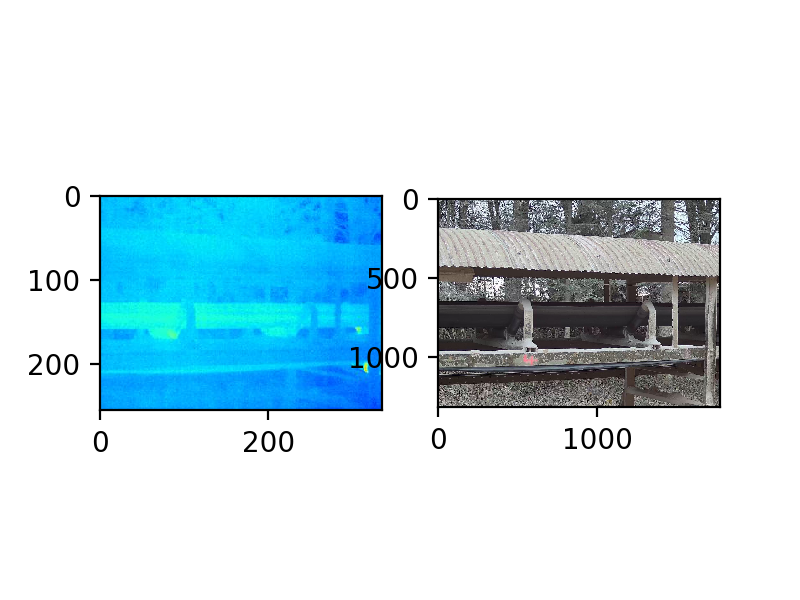

<IPython.core.display.Javascript object>


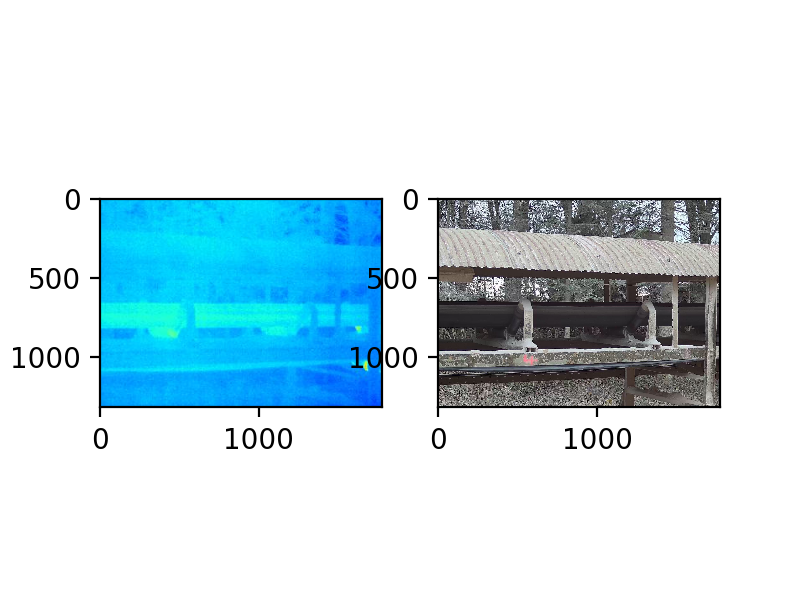

In [8]:
%matplotlib notebook
ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/ir_frames/DJI_3005_0/3005000000.jpg')
print('ir_image shape:', ir_image.shape)
rgb_image = cv2.imread('/home/ubuntu/gfav/data/phase3/rgb_frames_int/DJI_3005_0/3005000000.jpg')
print('rgb_image shape:', rgb_image.shape)
rgb_crop = rgb_image[426:1741, 1001:2776, :].copy()
print('rgb_crop shape:', rgb_crop.shape)
ir_resize = cv2.resize(ir_image, (rgb_crop.shape[1], rgb_crop.shape[0]))
figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.show()
figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
plt.show()
figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ir_resize, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_crop, cv2.COLOR_BGR2RGB))
plt.show()

### apply retinanet on IR and RGB crops

In [10]:
dir_name = 'DJI_3011_0/'
img_list = os.listdir('/home/ubuntu/gfav/data/phase3/rgb_frames_crop/' + dir_name)
for img_file in img_list:
    img = cv2.imread('/home/ubuntu/gfav/data/phase3/rgb_frames_crop/' + dir_name + img_file)
    if img is None:
        continue
    ir_img = cv2.imread('/home/ubuntu/gfav/data/phase3/ir_frames/' + dir_name + img_file)
    ir_copy = ir_img.copy()
    im = img.copy()
    outputs = predictor(im)
    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
    cv2.imwrite('/home/ubuntu/gfav/data/phase3/rgb_output/' + dir_name + img_file, v.get_image()[:, :, ::-1])
    v = Visualizer(ir_copy[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    cv2.imwrite('/home/ubuntu/gfav/data/phase3/ir_output/' + dir_name + img_file, v.get_image()[:, :, ::-1])
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()


<IPython.core.display.Javascript object>


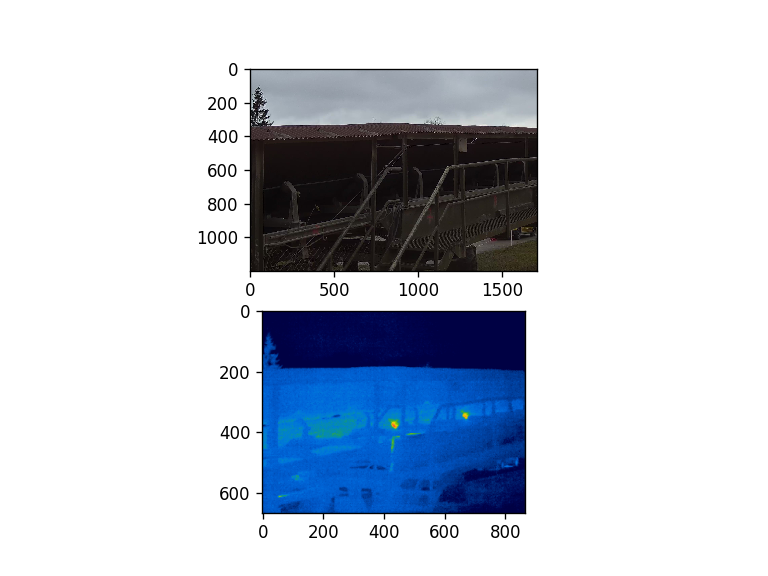

In [3]:
# %matplotlib notebook
# rgb_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_RGB/DJI_0009_0009.jpg')
# ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_IR/DJI_0009_0009.png')
# plt.subplot(2, 1, 1)
# plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
# plt.subplot(2, 1, 2)
# plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
# plt.show()

In [4]:
rgb_image.shape

(1200, 1710, 3)

In [5]:
ir_image.shape

(665, 865, 3)

### map temperature

In [3]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import cv2
import numpy as np
import os
import xml.etree.ElementTree as ET

In [14]:
temperature_scale_img = cv2.imread('/home/ubuntu/gfav/data/jet_colormap.png')
temperature_scale_img = temperature_scale_img[:, 10:20, :]
atm_temp = 9
resized_scale = cv2.resize(temperature_scale_img, (temperature_scale_img.shape[1], atm_temp))

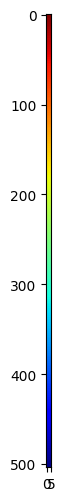

In [15]:
# %matplotlib notebook
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(temperature_scale_img, cv2.COLOR_BGR2RGB))
plt.show()

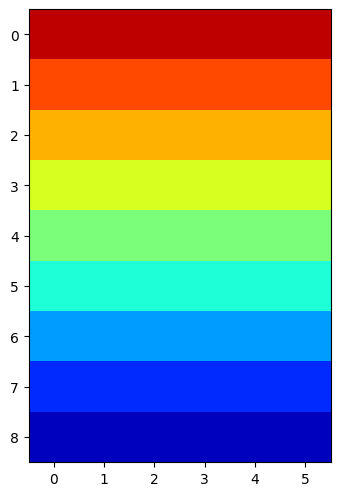

In [16]:
# %matplotlib notebook
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(resized_scale, cv2.COLOR_BGR2RGB))
plt.show()

### finding temperature distribution

In [17]:
def temperature_distribution(frame, temperature_scale, atm_temp):
    temperature_array = np.ndarray(frame.shape[:2])
    for row in range(frame.shape[0]):
        for col in range(frame.shape[1]):
            bgr_pixel = frame[row, col, :].astype(int)
            diffence_values = []
            for scale_value in temperature_scale:
                diffence_values.append(np.sum(np.abs(scale_value.astype(int) - bgr_pixel)))
            temperature_array[row, col] = atm_temp - np.argmin(diffence_values)
    return temperature_array.astype(int)
#     return bin_values

In [16]:
# %matplotlib inline
# xml_list = os.listdir('/home/ubuntu/gfav/data/phase3/shortlisted_frames/labels_cropped_ir_manually/')
# for xml_file in xml_list:
#     root = ET.parse('/home/ubuntu/gfav/data/phase3/shortlisted_frames/labels_cropped_ir_manually/' + xml_file).getroot()
#     ir_image = cv2.imread('/home/ubuntu/gfav/data/phase3/shortlisted_frames/cropped_IR/' + xml_file[:-3] + 'png')
#     label_image = ir_image.copy()
#     some_objects = root.findall('object')
#     for bbox in some_objects:
#         xmin = int(bbox[4][0].text)
#         ymin = int(bbox[4][1].text)
#         xmax = int(bbox[4][2].text)
#         ymax = int(bbox[4][3].text)
#         image_crop = ir_image[ymin:ymax, xmin:xmax, :].copy()
#         cv2.rectangle(label_image, (xmin, ymin), (xmax, ymax),(255,0,0),5)
#         temperature_array = temperature_distribution(image_crop, resized_scale[:, 5, :])
#         max_temperature = np.max(temperature_array)
#         (weights, bin_values) = np.histogram(temperature_array, bins=range(-2, 10))
#         cv2.putText(label_image, str(max_temperature - 2), (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 4)
#         figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
# #         plt.subplot(2,1,1)
# #         plt.imshow(cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB))
# #         plt.subplot(2,1,2)
# #         plt.hist(temperature_array.flatten(), bins=bin_values, edgecolor='black', log=True)
# #         plt.show()
#         print('max_temperature:', max_temperature - 2)
#         print('weights:', weights)
#         print('max_temperature weight:', weights[max_temperature - 13])
# #         break
#     cv2.imwrite('/home/ubuntu/gfav/data/phase3/shortlisted_frames/output_IR_manual/' + xml_file[:-3] + 'png', label_image)
# #     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
# #     plt.imshow(cv2.cvtColor(label_image, cv2.COLOR_BGR2RGB))
# #     plt.show
# #     break

In [21]:
dir_name = 'DJI_3011_0/'
img_list = os.listdir('/home/ubuntu/gfav/data/phase3/rgb_frames_crop/' + dir_name)
for img_file in img_list:
    img = cv2.imread('/home/ubuntu/gfav/data/phase3/rgb_frames_crop/' + dir_name + img_file)
    if img is None:
        continue
    ir_img = cv2.imread('/home/ubuntu/gfav/data/phase3/ir_frames/' + dir_name + img_file)
    ir_copy = ir_img.copy()
    im = img.copy()
    outputs = predictor(im)
    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
    cv2.imwrite('/home/ubuntu/gfav/data/phase3/rgb_output/' + dir_name + img_file, v.get_image()[:, :, ::-1])
    for bbox_tensor in outputs["instances"].pred_boxes:
        bbox = bbox_tensor.cpu().numpy()
        xmin = int(bbox[0])
        ymin = int(bbox[1])
        xmax = int(bbox[2])
        ymax = int(bbox[3])
        image_crop = ir_img[ymin:ymax, xmin:xmax, :].copy()
        image_crop = cv2.resize(image_crop, (0, 0), fx=0.25, fy=0.25)
        temperature_array = temperature_distribution(image_crop, resized_scale[:, 5, :], atm_temp)
        max_temperature = np.max(temperature_array)
#         (weights, bin_values) = np.histogram(temperature_array, bins=range(0, 20))
        cv2.putText(ir_copy, str(max_temperature), (xmin, ymax), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,205,12), 4)
    cv2.putText(ir_copy, 'Atmospheric temperature:' + str(atm_temp), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,205,12), 4)
    v = Visualizer(ir_copy[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    cv2.imwrite('/home/ubuntu/gfav/data/phase3/ir_output/' + dir_name + img_file, v.get_image()[:, :, ::-1])
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
#     break
